# Tarefa:
> Aplicar funções dentro da biblioteca prism.py que calcula o valor da anomalia gravitacional em cada ponto de observação considerando desde um retângulo a diversos retângulos. Para isso, foram montados exemplos demonstrados mais abaixo. <br>
<br>
Além disso, montar um caso onde se dá a liberdade para o usuário gerar a situação qualquer desejada por ele. <br>

In [1]:
# Importando bibliotecas do python
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
# path referente aa localizacao da pasta modules:
sys.path.append('/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules') # pc do Bijani
#sys.path.append('C:/Users/bruno/Documents/Projeto - Bijani/GitHub/IC-UFF/modules') # pc do Bruno

In [3]:
# Importando bibliotecas extras
import prism

# Exemplos

# Considerações para os exemplos desenvolvidos:
> (1) O número de retângulos utilizados sempre é igual ao número de observações consideradas no mesmo exemplo em todos os exemplos demonstrados mais abaixo; <br>
<br>
(2) Os retângulos foram justapostos e colocados todos no mesmo tamanho; <br>
<br>
(3) Todas as observações foram definidas por z = 0.0, y = 0.0 e com x = 0.0 para o caso de 1 retangulo e observação ou x é definido por um vetor gerado por np.linspace cujos parâmetros foram fornecidos em cada exemplo; <br>
<br>
(4) Como a função log foi aplicada sobre os limites que definem os modelos de retângulos utilizados, adotou-se limites (xmin, xmax, zmin, zmax) diferentes de zero mas com valores próximos de zero (-0.1 ou 0.1, por exemplo) quando se quis tentar aproximar do mesmo.

In [4]:
# Coletando informações

# Coletando os limites em x e z do levantamento sintetico
zmin = -0.1   # limite minimo em z do levantamento sintetico
zmax = 10.0  # limite maximo em z do levantamento sintetico
xmin = 0.1   # limite minimo em x do levantamento sintetico
xmax = 100.0 # limite maximo em x do levantamento sintetico

In [5]:
# Gerando exemplos

###############################################################################################################
# Caso de 1 retangulo
n1 = 1 # numero de retangulos e tambem de observacoes

x1 = np.zeros(n1) # coordenada horizontal da observacao ao longo do eixo x
y1 = np.zeros(n1) # coordenada horizontal da observacao ao longo do eixo y
z1 = np.zeros(n1) # coordenada vertical da observacao ao longo do eixo z

x_prisma = xmax / 2.0 # um valor arbitrário utilizado para estipular os limites horizontais em x do retangulo

model = [x1 - x_prisma, x1 + x_prisma, 0.001, 0.002, zmin, zmax] # limites do retangulo
gx1 = prism.prism_gx(x1, y1, z1, model, 2.67)
gy1 = prism.prism_gy(x1, y1, z1, model, 2.67)
gz1 = prism.prism_gz(x1, y1, z1, model, 2.67)

###############################################################################################################
# Caso de 3 retangulos
n2 = 3 # numero de retangulos e tambem de observacoes

x2 = np.linspace(xmin, xmax, n2, endpoint=True) # coordenadas horizontais das observacoes ao longo do eixo x
y2 = x2*0.0                                     # coordenadas horizontais das observacoes ao longo do eixo y
z2 = np.zeros(n2)                               # coordenadas verticais das observacoes ao longo do eixo z

xmed = ( x2[0] + x2[1] ) / 2.0
x_prisma = abs( x2[0] - ( xmed ) ) # valor utilizado para se gerar retangulos justapostos e de mesmo tamanho

gx2 = 0
gy2 = 0
gz2 = 0
for i in range (n2):
    model = [x2[i] - x_prisma, x2[i] + x_prisma, 0.001, 0.002, zmin, zmax] # limites do retangulo
    # Calculating the gravity components
    gx2 += prism.prism_gx(x2, y2, z2, model, 2.67)
    gy2 += prism.prism_gy(x2, y2, z2, model, 2.67)
    gz2 += prism.prism_gz(x2, y2, z2, model, 2.67)

###############################################################################################################        
# Caso de 5 retangulos
n3 = 5 # numero de retangulos e tambem de observacoes

x3 = np.linspace(xmin, xmax, n3, endpoint=True) # coordenadas horizontais das observacoes ao longo do eixo x
y3 = x3*0.0                                     # coordenadas horizontais das observacoes ao longo do eixo y
z3 = np.zeros(n3)                               # coordenadas verticais das observacoes ao longo do eixo z

xmed = ( x3[0] + x3[1] ) / 2.0
x_prisma = abs( x3[0] - ( xmed ) ) # valor utilizado para se gerar retangulos justapostos e de mesmo tamanho

gx3 = 0
gy3 = 0
gz3 = 0
for i in range (n3):
    model = [x3[i] - x_prisma, x3[i] + x_prisma, 0.001, 0.002, zmin, zmax] # limites do retangulo
    # Calculating the gravity components
    gx3 += prism.prism_gx(x3, y3, z3, model, 2.67)
    gy3 += prism.prism_gy(x3, y3, z3, model, 2.67)
    gz3 += prism.prism_gz(x3, y3, z3, model, 2.67)

###############################################################################################################
# Caso de 10 retangulos
n4 = 10 # numero de retangulos e tambem de observacoes

x4 = np.linspace(xmin, xmax, n4, endpoint=True) # coordenadas horizontais das observacoes ao longo do eixo x
y4 = x4*0.0                                     # coordenadas horizontais das observacoes ao longo do eixo y
z4 = np.zeros(n4)                               # coordenadas verticais das observacoes ao longo do eixo z

xmed = ( x4[0] + x4[1] ) / 2.0
x_prisma = abs( x4[0] - ( xmed ) ) # valor utilizado para se gerar retangulos justapostos e de mesmo tamanho

gx4 = 0
gy4 = 0
gz4 = 0
for i in range (n4):
    model = [x4[i] - x_prisma, x4[i] + x_prisma, 0.001, 0.002, zmin, zmax] # limites do retangulo
    # Calculating the gravity components
    gx4 += prism.prism_gx(x4, y4, z4, model, 2.67)
    gy4 += prism.prism_gy(x4, y4, z4, model, 2.67)
    gz4 += prism.prism_gz(x4, y4, z4, model, 2.67)

###############################################################################################################
# Caso de 25 retangulos
n5 = 25 # numero de retangulos e tambem de observacoes

x5 = np.linspace(xmin, xmax, n5, endpoint=True) # coordenadas horizontais das observacoes ao longo do eixo x
y5 = x5*0.0                                     # coordenadas horizontais das observacoes ao longo do eixo y
z5 = np.zeros(n5)                               # coordenadas verticais das observacoes ao longo do eixo z

xmed = ( x5[0] + x5[1] ) / 2.0
x_prisma = abs( x5[0] - ( xmed ) ) # valor utilizado para se gerar retangulos justapostos e de mesmo tamanho

gx5 = 0
gy5 = 0
gz5 = 0
for i in range (n5):
    model = [x5[i] - x_prisma, x5[i] + x_prisma, 0.001, 0.002, zmin, zmax] # limites do retangulo
    # Calculating the gravity components
    gx5 += prism.prism_gx(x5, y5, z5, model, 2.67)
    gy5 += prism.prism_gy(x5, y5, z5, model, 2.67)
    gz5 += prism.prism_gz(x5, y5, z5, model, 2.67)

###############################################################################################################
# Caso de 50 retangulos
n6 = 50 # numero de retangulos e tambem de observacoes

x6 = np.linspace(xmin, xmax, n6, endpoint=True) # coordenadas horizontais das observacoes ao longo do eixo x
y6 = x6*0.0                                     # coordenadas horizontais das observacoes ao longo do eixo y
z6 = np.zeros(n6)                               # coordenadas verticais das observacoes ao longo do eixo z

xmed = ( x6[0] + x6[1] ) / 2.0
x_prisma = abs( x6[0] - ( xmed ) ) # valor utilizado para se gerar retangulos justapostos e de mesmo tamanho

gx6 = 0
gy6 = 0
gz6 = 0
for i in range (n6):
    model = [x6[i] - x_prisma, x6[i] + x_prisma, 0.001, 0.002, zmin, zmax] # limites do retangulo
    # Calculating the gravity components
    gx6 += prism.prism_gx(x6, y6, z6, model, 2.67)
    gy6 += prism.prism_gy(x6, y6, z6, model, 2.67)
    gz6 += prism.prism_gz(x6, y6, z6, model, 2.67)

###############################################################################################################
# Caso de 100 retangulos
n7 = 100 # numero de retangulos e tambem de observacoes

x7 = np.linspace(xmin, xmax, n7, endpoint=True) # coordenadas horizontais das observacoes ao longo do eixo x
y7 = x7*0.0                                     # coordenadas horizontais das observacoes ao longo do eixo y
z7 = np.zeros(n7)                               # coordenadas verticais das observacoes ao longo do eixo z

xmed = ( x7[0] + x7[1] ) / 2.0
x_prisma = abs( x7[0] - ( xmed ) ) # valor utilizado para se gerar retangulos justapostos e de mesmo tamanho

gx7 = 0
gy7 = 0
gz7 = 0
for i in range (n7):
    model = [x7[i] - x_prisma, x7[i] + x_prisma, 0.001, 0.002, zmin, zmax] # limites do retangulo
    # Calculating the gravity components
    gx7 += prism.prism_gx(x7, y7, z7, model, 2.67)
    gy7 += prism.prism_gy(x7, y7, z7, model, 2.67)
    gz7 += prism.prism_gz(x7, y7, z7, model, 2.67)

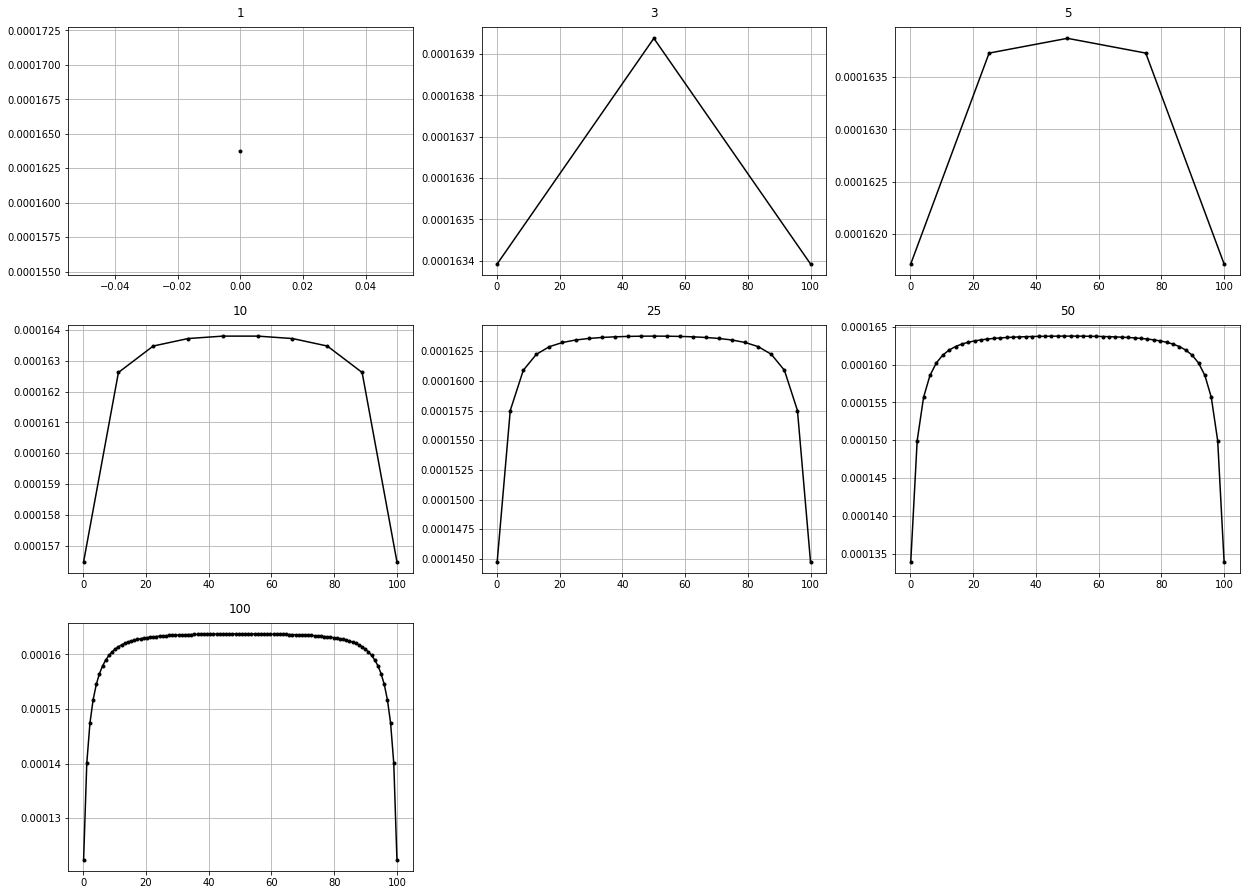

In [6]:
# Plotando os graficos dos exemplos

fig = plt.figure(figsize=(21,21),facecolor='w')
# Primeiro Mapa
plt.subplot(431)
plt.plot(x1,gz1,'.-k')
plt.grid()
plt.title('1',pad=10)

# Segundo Mapa
plt.subplot(432)
plt.plot(x2,gz2,'.-k')
plt.grid()
plt.title('3',pad=10)

# Terceiro Mapa
plt.subplot(433)
plt.plot(x3,gz3,'.-k')
plt.grid()
plt.title('5',pad=10)

# Quarto Mapa
plt.subplot(434)
plt.plot(x4,gz4,'.-k')
plt.grid()
plt.title('10',pad=10)

# Quinto Mapa
plt.subplot(435)
plt.plot(x5,gz5,'.-k')
plt.grid()
plt.title('25',pad=10)

# Sexto Mapa
plt.subplot(436)
plt.plot(x6,gz6,'.-k')
plt.grid()
plt.title('50',pad=10)

# Setimo Mapa
plt.subplot(437)
plt.plot(x7,gz7,'.-k')
plt.grid()
plt.title('100',pad=10)

plt.show()

# Espaço teste para o usuário

# Considerações para o usuário desenvolver seu caso:
> (1) O número de retângulos utilizados pode ser diferente do número de observações consideradas; <br>
<br>
(2) Inicialmente, os retângulos foram construidos de uma forma provisória. O usuário tem liberdade para ajustar da forma que for com o objetivo de representar melhor o caso que deseja.

In [7]:
# Caso que considera um numero de observacoes arbitrado pelo usuario (Parte 1)

# Coletando informações

# Coletando os limites em x e z do levantamento sintetico
zmin2 = -0.1   # limite minimo em z do levantamento sintetico
zmax2 = 10.0  # limite maximo em z do levantamento sintetico
xmin2 = 0.1   # limite minimo em x do levantamento sintetico
xmax2 = 100.0 # limite maximo em x do levantamento sintetico

# Gerando observacoes
no = 5   # numero de observacoes

xo = np.linspace(xmin2, xmax2, no, endpoint=True) # coordenadas horizontais das observacoes ao longo do eixo x
yo = xo*0.0                                       # coordenadas horizontais das observacoes ao longo do eixo y
zo = np.zeros(no)                                 # coordenadas verticais das observacoes ao longo do eixo z

# Gerando retangulos
nr = 10 # numero de retangulos

xr = np.linspace(xmin2, xmax2, nr, endpoint=True)

if nr == 1:
    x_prisma = xmax2 / 2.0 # um valor arbitrário utilizado para estipular os limites horizontais em x do retangulo
else:
    xmed = ( xr[0] + xr[1] ) / 2.0
    x_prisma = abs( xr[0] - ( xmed ) ) # valor utilizado para se gerar retangulos justapostos e de mesmo tamanho

model = []
for i in range (nr):
    model.append([xr[i] - x_prisma, xr[i] + x_prisma, 0.001, 0.002, zmin2, zmax2]) # meters + g/cm3]

In [8]:
# Caso que considera um numero de observacoes arbitrado pelo usuario (Parte 2)

# Calculando os valores medidos em cada observacao
gx = 0
gy = 0
gz = 0
for i in range (nr):
    # Calculating the gravity components
    gx += prism.prism_gx(xo, yo, zo, model[i], 2.67)
    gy += prism.prism_gy(xo, yo, zo, model[i], 2.67)
    gz += prism.prism_gz(xo, yo, zo, model[i], 2.67)

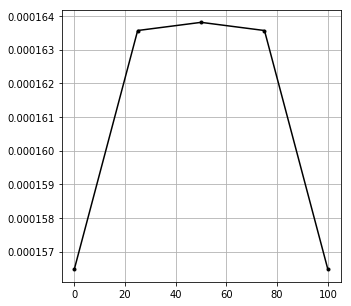

In [9]:
# Caso que considera um numero de observacoes arbitrado pelo usuario (Parte 3)

# Plotando o grafico
fig = plt.figure(figsize=(5,5),facecolor='w')
plt.plot(xo,gz,'.-k')
plt.grid()
plt.show()